In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity

# Load and format the data

In [2]:
# Load the saved data into a data frame
dataFrame = pd.read_csv('ParameterData.csv', header=0, index_col=0, sep=',')

In [3]:
# Group by classification
groups = dataFrame.T.groupby( dataFrame.T.columns[-1] )
successGroup = groups.get_group(1)
failureGroup = groups.get_group(0)

# Plot

In [4]:
params = dataFrame.T.columns.tolist()[:-1] # For indexing and labels

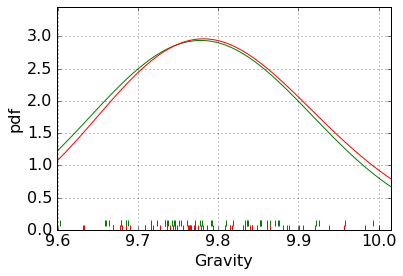

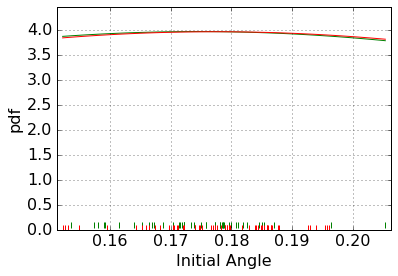

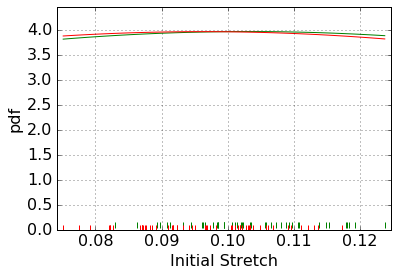

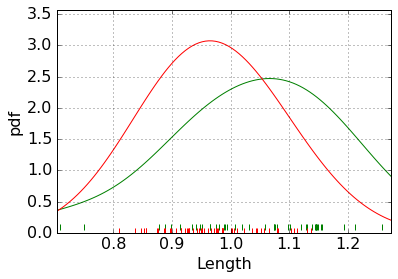

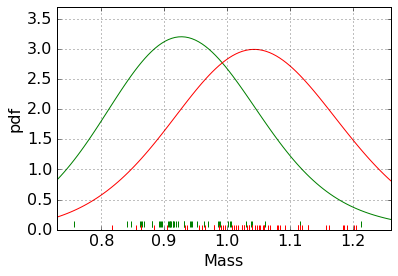

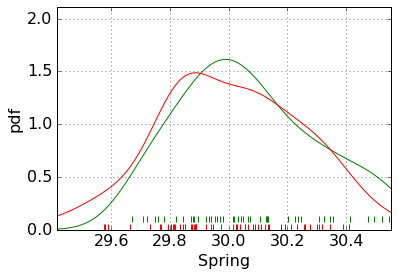

In [10]:
kernel = 'gaussian'
bandwidth = 0.1
 
plt.rc('font', size=16)

for num in range(len(params)):
    param = params[num]
    
    successes = successGroup[param]
    failures = failureGroup[param]
    
    # Create the np.linspace array of x-values for plotting
    # Find min and max data points for the np.linspace array
    minX = min(successes)
    maxX = max(successes)
        
    if min(failures) < minX:
        minX = min(failures)

    if max(failures) > maxX:
        maxX = max(failures)

    # Create the array
    xArray = np.linspace(minX, maxX, 100) # array of 100 x-values for plotting the kde 
                                     # like [ minGrav, ...., maxGrav ] with length of 100
    
    ### Plot the Kernel Densities (using each kernel type with default bandwidths=1.0 (very large) )

    # This is more so you can see the differences, we will just let the computer optimize this automatically, though,
    # along with the bandwidth. (Next cell)
        
    #for kernel in ['epanechnikov','gaussian','linear','exponential','cosine','tophat']:
    
    # Fit a kernel density model to our data: one for our successes, ones for our failures
     
    successKDE = KernelDensity( kernel=kernel, bandwidth=bandwidth ).fit( successes.values.reshape(-1,1) ) 
                                                    # Must reshape the gravSuccess to send 2D array
                                                    # .reshape(-1,1)  makes it [ [gravS1], [gravS2], ...]
                                                    # We do it this way because it is a single sample of the successes
                                                    # The kde.fit() function wants a 2D array with each 'row' being 
                                                    # an independent variable, or x-value, and we only have one here, the gravity
    
    failureKDE = KernelDensity( kernel=kernel, bandwidth=bandwidth ).fit( failures.values.reshape(-1,1) )
        
            # 'Score' a 'sample', or feed the kernel density a range of values and have it return the pdf
    successLogScores = successKDE.score_samples( xArray.reshape(-1,1) ) # score_samples is used to return the log density (somehow this is best)
                                                # this means that it returns the natural log of the density 
                                                # we will convert it back to regular density with "np.exp(scores)" for plotting
                                                # np.exp(scores) function gives us a list of e^(score) 
                                                # so it will essentially give us the value itself
                                                # since e^(ln x)=x
                        
    failureLogScores = failureKDE.score_samples( xArray.reshape(-1,1) )

        # Plot kde's
        #plt.figure( figsize=(10,5) )
    line_1 = plt.plot(xArray, np.exp(successLogScores), color='green')
    line_2 = plt.plot(xArray, np.exp(failureLogScores), color='red')
    plt.grid()
    #plt.title(param, fontsize=20)
    #plt.xticks( rotation=45 )
    plt.xlim(minX-.001, maxX+.001)
    plt.xlabel(param)
    plt.ylabel('pdf')
    #plt.show()
    
        # Plot the individual successes and failures along the bottom for visual comparison to the kde distribution
    maxY = max( line_1[0].get_ydata() )
    if max( line_2[0].get_ydata() ) > maxY:
        maxY = max( line_2[0].get_ydata() )
    
    plt.ylim(0, maxY+.5 )
    
    plt.plot(successes, np.full_like(successes, 0.1), '|k', color='green', markeredgewidth=1.0)
    plt.plot(failures, np.full_like(failures, 0.03), '|k', color='red', markeredgewidth=1.0)
    plt.savefig('KDE_'+param+'.png')
    plt.show()